# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [2]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

# 資料準備

# Image normalize 

# 轉換label 為OneHot Encoding

In [3]:
(x_img_train,y_label_train), (x_img_test, y_label_test) = cifar100.load_data()

169009152/169001437 [==============================] - 151s 1us/step


In [4]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [5]:
print(x_img_train.shape)
print(y_label_train.shape)

print(x_img_test.shape)
print(y_label_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

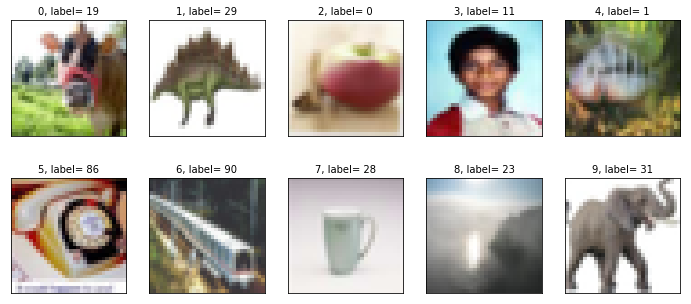

In [10]:
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25 
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')     
        title = str(i) + ', label= ' + str(labels[i][0])
        if len(prediction) > 0:
            title += '=>' + label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([])
        ax.set_yticks([])        
        idx+=1 
    plt.show()
    
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [11]:

print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


In [12]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [13]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

In [14]:
y_label_train.shape

(50000, 1)

In [17]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [18]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
print(y_label_train_OneHot.shape)
y_label_train_OneHot[:5]

(50000, 100)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.